In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Import CSV File

In [2]:
df = pd.read_csv('/kaggle/input/videogamesales/vgsales.csv', index_col = 'Rank' )

In [3]:
df.head(25)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [4]:
df.tail(5)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


# Data Processing - Checking Null Values and data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [6]:
df.isnull().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# Handing Null Values

If we are not aware about the data then we need to fill accordingly , So In null values of Year Column we can fill by Mean, Median or Mode.

In [7]:
df["Year"] = df["Year"].fillna(df["Year"].median())

In [8]:
df["Publisher"] = df["Publisher"].fillna("Unknown")


In [9]:
df.isnull().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

# Checking duplicates values on the basis of subsets

In [10]:
duplicates = df[df.duplicated(subset = ['Name','Platform','Year'],keep = False)]

In [11]:
print(duplicates)

                              Name Platform    Year    Genre        Publisher  \
Rank                                                                            
604                  Madden NFL 13      PS3  2012.0   Sports  Electronic Arts   
15000  Wii de Asobu: Metroid Prime      Wii  2007.0  Shooter         Nintendo   
15002  Wii de Asobu: Metroid Prime      Wii  2007.0  Shooter         Nintendo   
16130                Madden NFL 13      PS3  2012.0   Sports  Electronic Arts   

       NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
Rank                                                            
604        2.11      0.23      0.00         0.22          2.56  
15000      0.00      0.00      0.02         0.00          0.02  
15002      0.00      0.00      0.02         0.00          0.02  
16130      0.00      0.01      0.00         0.00          0.01  


# Remove Duplicates

In [12]:
df.drop_duplicates(inplace=True)


In [13]:
print(df.duplicated().sum())

0


# Change Datatype

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16597 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16597 non-null  object 
 1   Platform      16597 non-null  object 
 2   Year          16597 non-null  float64
 3   Genre         16597 non-null  object 
 4   Publisher     16597 non-null  object 
 5   NA_Sales      16597 non-null  float64
 6   EU_Sales      16597 non-null  float64
 7   JP_Sales      16597 non-null  float64
 8   Other_Sales   16597 non-null  float64
 9   Global_Sales  16597 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [15]:
df["Year"] = df["Year"].astype(int)

In [16]:
df.dtypes

Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

# Exploratory Data Analysis (EDA) - Summary Statistics

In [17]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16597.000000,16597.000000,16597.000000,16597.000000,16597.000000,16597.000000
mean,2006.416099,0.264683,0.146661,0.077785,0.048066,0.537472
std,5.781859,0.816705,0.505365,0.309300,0.188594,1.555070
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [18]:
df['NA_Sales'].min()

0.0

In [19]:
df['NA_Sales'].max()

41.49

In [20]:
df['NA_Sales'].mean()

0.26468337651382784

In [21]:
df['Year'].min()

1980

In [22]:
df['Year'].median()

2007.0

In [23]:
df['Year'].mode()

0    2007
Name: Year, dtype: int64

In [24]:
df['Year'].mean()

2006.4160992950533

In [25]:
df['Year'].max()

2020

In [26]:
df['Global_Sales'].max()

82.74

In [27]:
df['Global_Sales'].min()

0.01

# Data Insights & Aggregations

In [28]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [29]:
df['Year'].unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2003, 1986, 2000, 1995, 2016, 1991,
       1981, 1987, 1980, 1983, 2020, 2017])

In [30]:
sorted(df['Year'].unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2020]

In [31]:
df.loc[df['NA_Sales'].idxmax()]

Name            Wii Sports
Platform               Wii
Year                  2006
Genre               Sports
Publisher         Nintendo
NA_Sales             41.49
EU_Sales             29.02
JP_Sales              3.77
Other_Sales           8.46
Global_Sales         82.74
Name: 1, dtype: object

In [32]:
df.loc[df['NA_Sales'].idxmin()]

Name            Monster Hunter Freedom 3
Platform                             PSP
Year                                2010
Genre                       Role-Playing
Publisher                         Capcom
NA_Sales                             0.0
EU_Sales                             0.0
JP_Sales                            4.87
Other_Sales                          0.0
Global_Sales                        4.87
Name: 215, dtype: object

In [33]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)


Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.69
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

In [34]:
df['NA_Sales'].idxmax()

1

# Data Visualization

**Bar Chart**

Text(0.5, 1.0, 'Global Sales Trends')

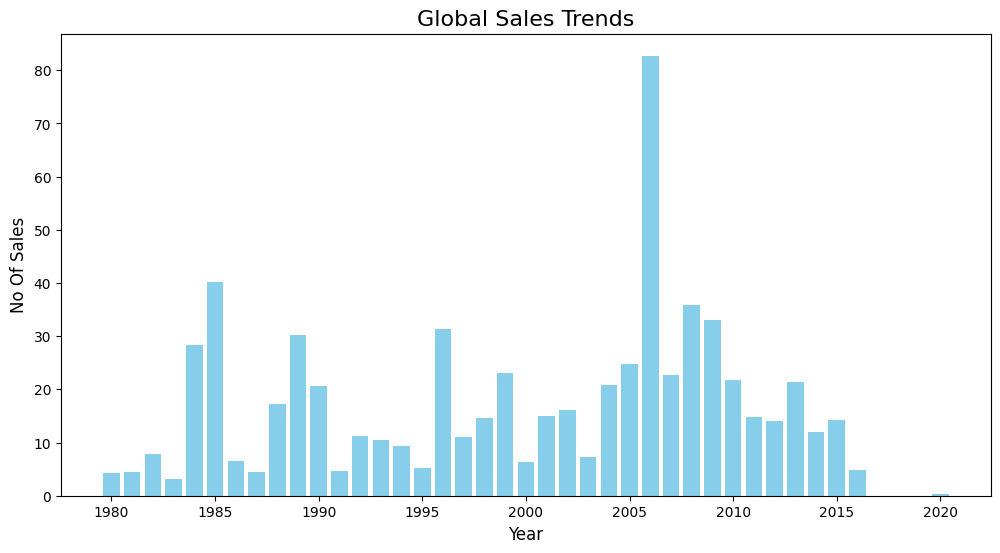

In [35]:

plt.figure(figsize=(12, 6))
plt.bar(df["Year"], df["Global_Sales"],color = "skyblue")
plt.xlabel("Year",fontsize = 12)
plt.ylabel("No Of Sales",fontsize = 12)
plt.title("Global Sales Trends", fontsize = 16)


In [36]:
df.nunique()

Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

**Plot Chart**

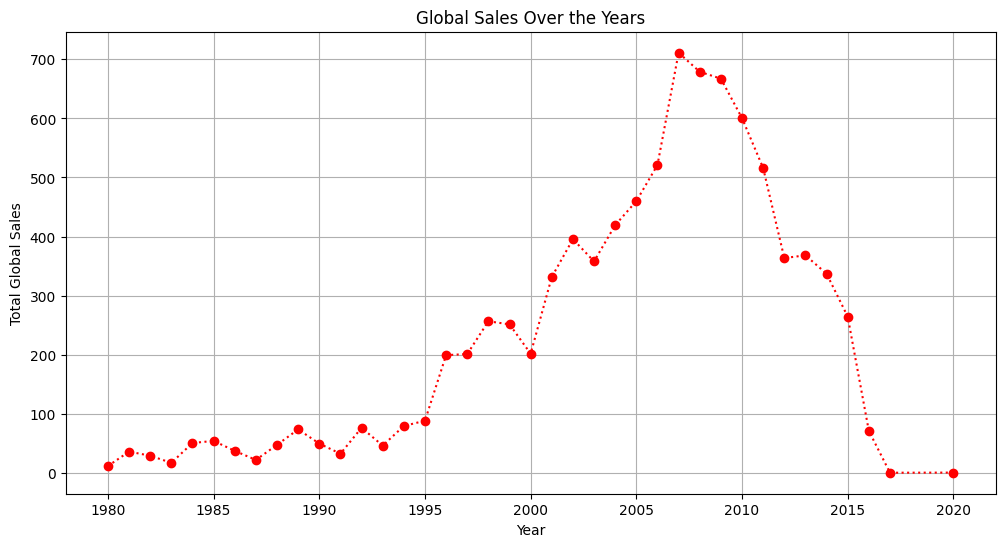

In [37]:
plt.figure(figsize=(12, 6))
df.groupby("Year")["Global_Sales"].sum().plot(marker="o", linestyle=":", color="red")
plt.title("Global Sales Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Global Sales")
plt.grid(True)

**Pie Chart**

Text(0.5, 1.0, 'Sales Distribution by Region')

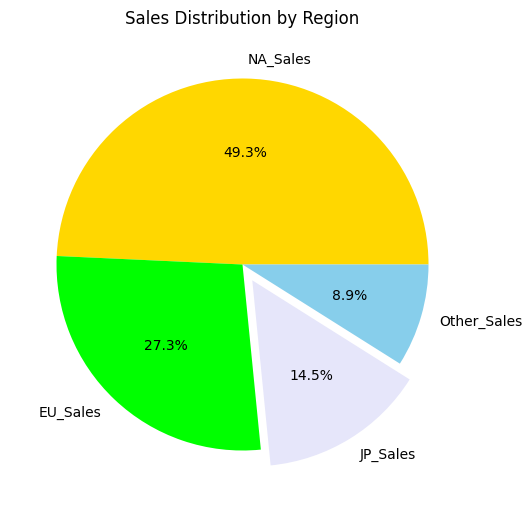

In [38]:
plt.figure(figsize=(6, 8))
explode = (0, 0, 0.1, 0)
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().plot(
    kind='pie', autopct='%1.1f%%',explode = explode , colors=['gold', 'lime', 'lavender', 'skyblue'])
plt.title("Sales Distribution by Region")

**Scatter Plot**

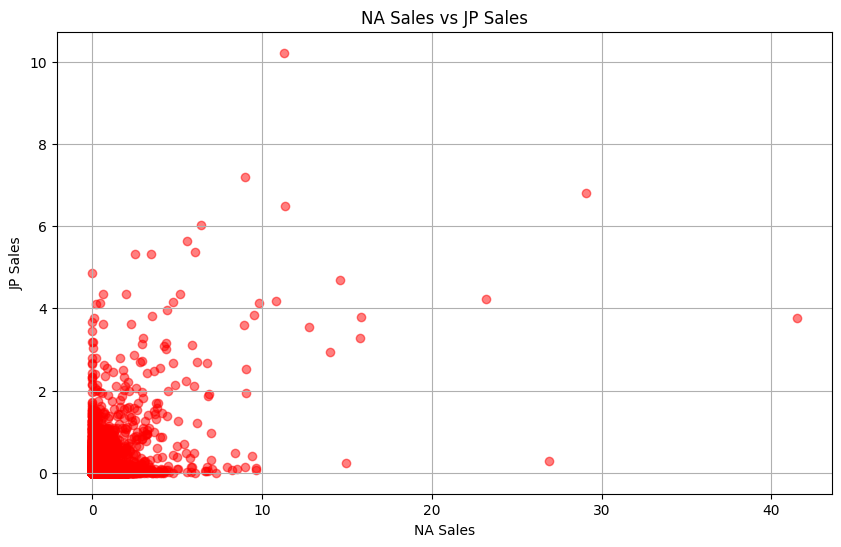

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(df['NA_Sales'], df['JP_Sales'], alpha=0.5, color="red",marker = "o")
plt.title("NA Sales vs JP Sales")
plt.xlabel("NA Sales")
plt.ylabel("JP Sales")
plt.grid(True)

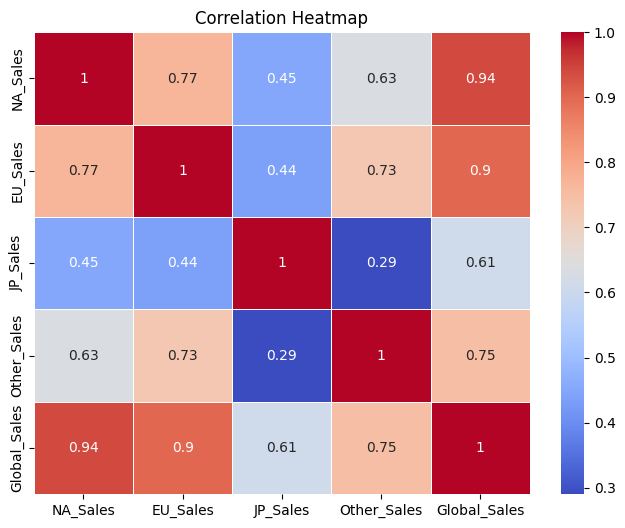

In [40]:

plt.figure(figsize=(8, 6))
sns.heatmap(df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(), 
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()